#  Dimensionality Reduction with PCA

In [4]:
# Data manipulation
%matplotlib inline
import time

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [5]:
# Import custom class
%run -i '../helper/transfxn.py'

## Load data

In [6]:
df = pd.read_csv('../data/clean_data.csv')
print('Data size before pre-processing:',df.shape)
df.head()

Data size before pre-processing: (3817613, 23)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,33.0,Driver,Injury,Safety device used,Motor Vehicle Driver,2890
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,70.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,2890
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1988.0,1.0,F,38.0,Driver,Injury,Safety device used,Motor Vehicle Driver,4332
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,1.0,M,34.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,5053
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,2.0,M,30.0,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger,5053


In [7]:
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

## Create feature matrix & class label

In [8]:
# Feature matrix and class variable
X, y = df.drop(['FATAL'], axis = 1), df['FATAL']

In [9]:
# Relabel the class variable
y = y.map({0:'Non-fatal', 1: 'Fatal'})

## Transformation pipeline

In [10]:
# Instantiate the class
transfxn = TransformationPipeline()

In [11]:
# Transform and scale data
X_scaled, _ = transfxn.complete_pipeline_2(X, X)

In [12]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (3817613, 134)


## PCA plot

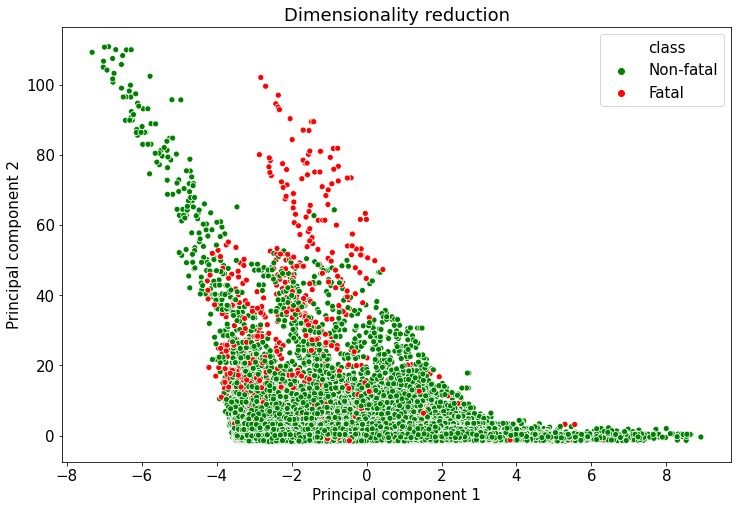

This cell took 9.428361582756043 mins to run


In [13]:
t0 = time.time()

transfxn.pca_plot_labeled(X_scaled.todense(), y, palette = ['g', 'r'])
print('This cell took {} mins to run'.format((time.time()-t0)/60))